<a href="https://colab.research.google.com/github/julmoram/TelecomX_LATAM2/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importación de Datos

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/julmoram/TelcomX_LATAM/main/datos_tratados.csv'
datos = pd.read_csv(url)
print(datos.head())

   Churn  SeniorCitizen  tenure  PhoneService  MultipleLines InternetService  \
0      0              0       9             1              0             dsl   
1      0              0       9             1              1             dsl   
2      1              0       4             1              0     fiber optic   
3      1              1      13             1              0     fiber optic   
4      1              1       3             1              0     fiber optic   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            1            1   
1               0             0                 0            0            0   
2               0             0                 1            0            0   
3               0             1                 1            0            1   
4               0             0                 0            1            1   

   StreamingMovies        Contract  Paperles

In [2]:
datos['PaymentMethod'].unique()

array(['mailed check', 'electronic check', 'credit card (automatic)',
       'bank transfer (automatic)'], dtype=object)

#  Exploración de Datos

Tasa de cancelación en clientes Senior: 41.68%
Tasa de cancelación en clientes no Senior: 23.65%


/tmp/ipython-input-30-357063612.py:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-30-357063612.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




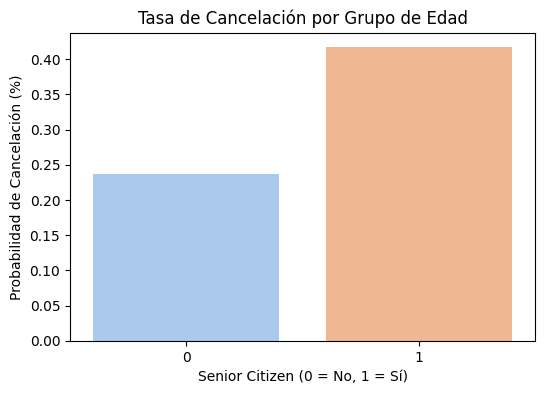

In [30]:
# Relación entre SeniorCitizen y Churn
senior_churn = datos.groupby('SeniorCitizen')['Churn'].mean() * 100
print(f"Tasa de cancelación en clientes Senior: {senior_churn[1]:.2f}%")
print(f"Tasa de cancelación en clientes no Senior: {senior_churn[0]:.2f}%")

# Gráfico de comparación
plt.figure(figsize=(6, 4))
sns.barplot(x='SeniorCitizen', y='Churn', data=datos, ci=None, palette='pastel')
plt.title("Tasa de Cancelación por Grupo de Edad")
plt.xlabel("Senior Citizen (0 = No, 1 = Sí)")
plt.ylabel("Probabilidad de Cancelación (%)")
plt.show()

Este análisis revela si los clientes mayores son más propensos a cancelar, lo que podría requerir estrategias de retención específicas.



Porcentaje de clientes que cancelan: 26.58%
Porcentaje de clientes activos: 73.42%


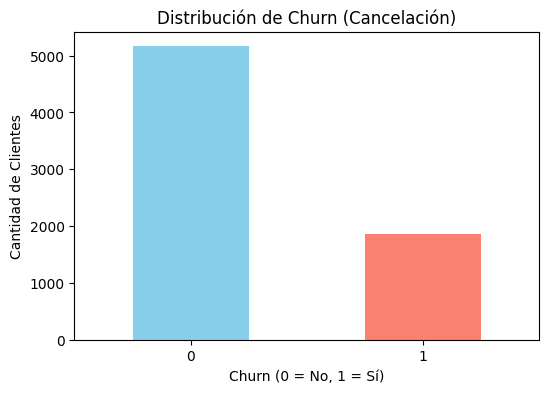

In [29]:
# Proporción de cancelaciones (Churn)
churn_rate = datos['Churn'].value_counts(normalize=True) * 100
print(f"Porcentaje de clientes que cancelan: {churn_rate[1]:.2f}%")
print(f"Porcentaje de clientes activos: {churn_rate[0]:.2f}%")

# Gráfico de distribución de Churn
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
datos['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribución de Churn (Cancelación)")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=0)
plt.show()

Un gráfico de barras ayuda a visualizar rápidamente el desbalance entre clientes que se van y los que se quedan.



Tasa de cancelación por tipo de contrato:
Contract
month-to-month    42.709677
one year          11.277174
two year           2.848665
Name: Churn, dtype: float64


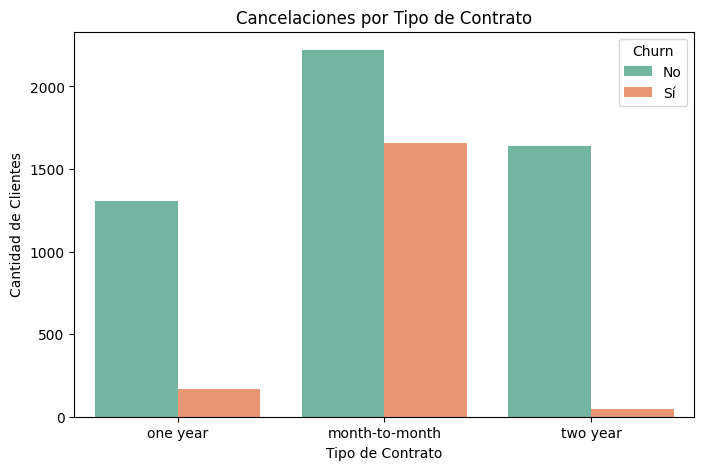

In [31]:
# Cancelación por tipo de contrato
contract_churn = datos.groupby('Contract')['Churn'].mean() * 100
print("Tasa de cancelación por tipo de contrato:")
print(contract_churn)

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=datos, palette='Set2')
plt.title("Cancelaciones por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Cantidad de Clientes")
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()

Este gráfico ayuda a identificar si los contratos mensuales tienen mayor rotación que los anuales/bianuales.

## Paso 1: Conociendo el dataset

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   PhoneService      7032 non-null   int64  
 4   MultipleLines     7032 non-null   int64  
 5   InternetService   7032 non-null   object 
 6   OnlineSecurity    7032 non-null   int64  
 7   OnlineBackup      7032 non-null   int64  
 8   DeviceProtection  7032 non-null   int64  
 9   TechSupport       7032 non-null   int64  
 10  StreamingTV       7032 non-null   int64  
 11  StreamingMovies   7032 non-null   int64  
 12  Contract          7032 non-null   object 
 13  PaperlessBilling  7032 non-null   int64  
 14  PaymentMethod     7032 non-null   object 
 15  Monthly           7032 non-null   float64
 16  Total             7032 non-null   float64


## 3. Análisis de Variables Categóricas y Verificación de la Proporción de Cancelación (Churn)

In [28]:
import plotly.express as px
from plotly.subplots import make_subplots
# Variables categóricas
binarias = ['Churn', 'SeniorCitizen', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'PaperlessBilling']
multiclase = ['InternetService', 'Contract', 'PaymentMethod']
todas = binarias + multiclase
# Cantidad total de gráficos y cantidad de filas necesarias
n = len(todas)
filas = (n + 1) // 2
# Gráficos
graf = make_subplots(
    rows=filas, cols=2,
    subplot_titles=todas,
    horizontal_spacing=0.1, vertical_spacing=0.1
)
for i, var in enumerate(todas):
    row = i // 2 + 1
    col = i % 2 + 1
    hist = px.histogram(datos, x=var, color='Churn', barmode='group')
    for trace in hist.data:
        trace.showlegend = False
        graf.add_trace(trace, row=row, col=col)
    graf.update_xaxes(showticklabels=True, showgrid=False, tickvals=None, row=row, col=col)
graf.update_layout(
    height=300 * filas,
    title_text="Distribución de variables categóricas (según Churn)",
    showlegend=False
)
graf.show()

## 4. Análisis de Variables Numéricas

### Variables numéricas

In [5]:
import plotly.express as px
from plotly.subplots import make_subplots
# Variables numéricas
numericas = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias']
# Cantidad total de gráficos y cantidad de filas necesarias
n = len(numericas)
filas = (n + 1) // 2
# Gráficos
graf = make_subplots(
    rows=filas, cols=2,
    subplot_titles=numericas,
    horizontal_spacing=0.1, vertical_spacing=0.1
)
for i, var in enumerate(numericas):
    row = i // 2 + 1
    col = i % 2 + 1
    box = px.box(datos, x='Churn', y=var, color='Churn', points=False)
    for trace in box.data:
        trace.showlegend = (i == 0)  # solo la primera tiene leyenda
        graf.add_trace(trace, row=row, col=col)
    graf.update_xaxes(tickangle=0, row=row, col=col)
graf.update_layout(
    height=300 * filas,
    title_text="Distribución de variables numéricas según Churn",
    showlegend=True
)
graf.show()

# **PREPARACIÓN DE DATOS**

## 1. Separación Variables Explicativas (X) y Variable Respuesta (y)

In [6]:
X = datos.drop('Churn', axis = 1)
y = datos['Churn']

## 2. Transformación de Variables Explicativas

In [7]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
columnas = X.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['InternetService', 'Contract', 'PaymentMethod']
),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)
X = one_hot.fit_transform(X)
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__InternetService_dsl',
       'onehotencoder__InternetService_fiber optic',
       'onehotencoder__InternetService_no',
       'onehotencoder__Contract_month-to-month',
       'onehotencoder__Contract_one year',
       'onehotencoder__Contract_two year',
       'onehotencoder__PaymentMethod_bank transfer (automatic)',
       'onehotencoder__PaymentMethod_credit card (automatic)',
       'onehotencoder__PaymentMethod_electronic check',
       'onehotencoder__PaymentMethod_mailed check',
       'remainder__SeniorCitizen', 'remainder__tenure',
       'remainder__PhoneService', 'remainder__MultipleLines',
       'remainder__OnlineSecurity', 'remainder__OnlineBackup',
       'remainder__DeviceProtection', 'remainder__TechSupport',
       'remainder__StreamingTV', 'remainder__StreamingMovies',
       'remainder__PaperlessBilling', 'remainder__Monthly',
       'remainder__Total', 'remainder__Cuentas_Diarias'], dtype=object)

In [8]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))

,onehotencoder__InternetService_dsl,onehotencoder__InternetService_fiber optic,onehotencoder__InternetService_no,onehotencoder__Contract_month-to-month,onehotencoder__Contract_one year,onehotencoder__Contract_two year,onehotencoder__PaymentMethod_bank transfer (automatic),onehotencoder__PaymentMethod_credit card (automatic),onehotencoder__PaymentMethod_electronic check,onehotencoder__PaymentMethod_mailed check,...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Monthly,remainder__Total,remainder__Cuentas_Diarias
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,2.19
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,2.00
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,2.46
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,3.27
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,1.84
7028,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,2.84
7029,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.68
7030,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,2.26


## 3. Separación de datos para Entrenamiento, Validación y Prueba

In [9]:
from sklearn.model_selection import train_test_split
# PRUEBA (temp)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=5
)
# ENTRENAMIENTO (train) Y VALIDACION (val)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=5
)

## 4. Balanceo de Clases

In [10]:
from imblearn.over_sampling import SMOTE
# Solo en grupo de train
smote = SMOTE(random_state=5)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print(pd.Series(y_train_bal).value_counts(normalize=True))

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


# **MODELO DE BASE / DUMMY**

## Generación del Modelo de Referencia (Baseline)

In [11]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.7345971563981043

In [12]:
churn_porcentaje = datos['Churn'].value_counts(normalize=True) * 100
# Mostrar resultados
print("\nPorcentaje de Churn:")
print(churn_porcentaje)



Porcentaje de Churn:
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


*Modelo Dummy: El porcentaje de exactitud es similar al porcentaje de Churn negativo (de clientes que siguien siendo clientes), por lo cual podemos suponer que el modelo no refleja verdadera capacidad para predecir datos, sino simplemente la dominancia de la clase 0 - "no churn".*

# **CORRELACIÓN Y SELECCIÓN DE VARIABLES**

## 1. Análisis de Correlación

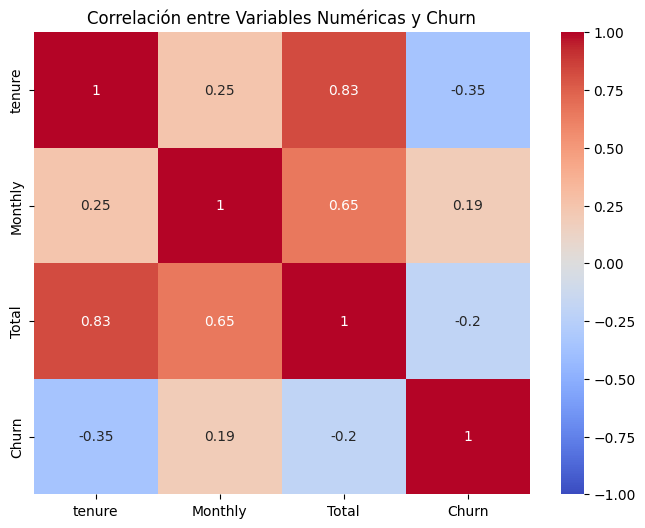

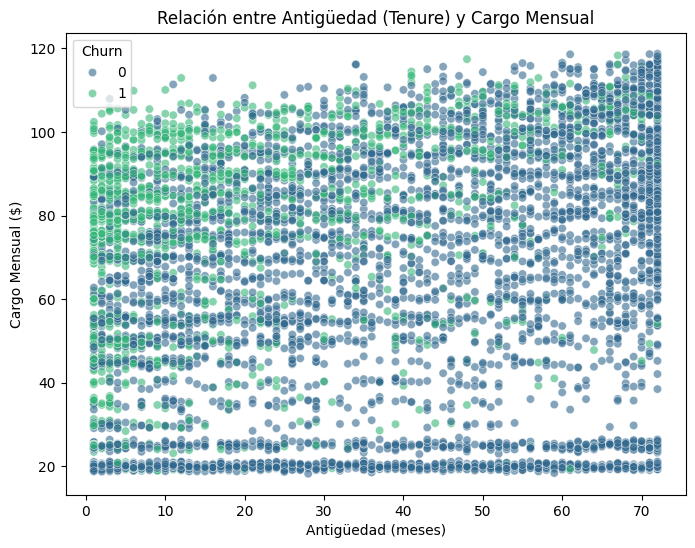

In [32]:
# Matriz de correlación
corr = datos[['tenure', 'Monthly', 'Total', 'Churn']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlación entre Variables Numéricas y Churn")
plt.show()

# Gráfico de dispersión: MonthlyCharges vs. Tenure
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='Monthly', hue='Churn', data=datos, alpha=0.6, palette='viridis')
plt.title("Relación entre Antigüedad (Tenure) y Cargo Mensual")
plt.xlabel("Antigüedad (meses)")
plt.ylabel("Cargo Mensual ($)")
plt.show()


Los datos sugieren que clientes con gastos más altos (Monthly, Total) y mayor antigüedad (Tenure) tienden a abandonar menos

## 2. Análisis Dirigido

In [14]:
import plotly.express as px

px.box(datos, x='Churn', y='tenure', color='Churn', points='outliers', width=800, height=600, title='Distribución de tenure según cancelación').show()
px.box(datos, x='Churn', y='Total', color='Churn', points='outliers', width=800, height=600, title='Distribución de Total según cancelación').show()

El análisis revela una relación inversa entre Tenure (antigüedad del cliente) y Churn (abandono), donde a mayor antigüedad, menor probabilidad de abandono. Además, se observa cierta variabilidad en la correlación entre Total (gastos acumulados) y Churn, con valores dispersos que sugieren patrones menos consistentes

# **MODELADO PREDICTIVO**

## 1. Generación del Modelo de Árbol de Decisión

In [15]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
arbol.fit(X_train, y_train)
arbol_val  = arbol.score(X_val,  y_val)
arbol_test = arbol.score(X_test, y_test)
print(f'Árbol: {arbol_test:.4f}')


Árbol: 0.7972


*Modelo de Árbol de Decisión: Superó al modelo baseline por más de 5 puntos, por lo que podemos inferir que hubo un aprendizaje para clasificar clientes que hacen churn.*

### Gráfico del Árbol de Decisión

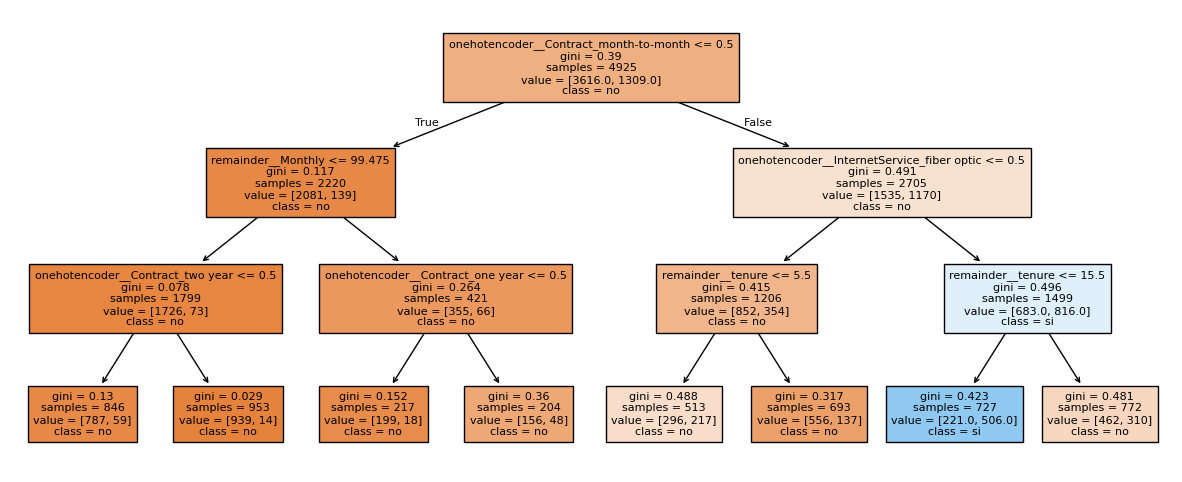

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
valores_columnas = [
    'onehotencoder__InternetService_dsl',
    'onehotencoder__InternetService_fiber optic',
    'onehotencoder__InternetService_no',
    'onehotencoder__Contract_month-to-month',
    'onehotencoder__Contract_one year',
    'onehotencoder__Contract_two year',
    'onehotencoder__PaymentMethod_bank transfer (automatic)',
    'onehotencoder__PaymentMethod_credit card (automatic)',
    'onehotencoder__PaymentMethod_electronic check',
    'onehotencoder__PaymentMethod_mailed check',
    'remainder__SeniorCitizen', 'remainder__tenure',
    'remainder__PhoneService', 'remainder__MultipleLines',
    'remainder__OnlineSecurity', 'remainder__OnlineBackup',
    'remainder__DeviceProtection', 'remainder__TechSupport',
    'remainder__StreamingTV', 'remainder__StreamingMovies',
    'remainder__PaperlessBilling', 'remainder__Monthly',
    'remainder__Total', 'remainder__Cuentas_Diarias'
]
plt.figure(figsize = (15, 6))
plot_tree(arbol, filled = True, class_names = ['no', 'si'], fontsize = 8, feature_names = valores_columnas);

*Si bien el análisis de la matriz de correlación arrojaba una correlación significativa entre el 'tenure' y el 'Churn', mediante la graficación del modelo de árbol de decisión, podemos observar que según este último modelo el nodo raíz correspondería al **tipo de contrato - mes a mes**. Dicha variable se podría explicar ya que los contratos mes a mes son más volátiles y podrían impactar en la no fidelización del cliente.*

## 2. Normalización de datos

*El modelo KNN, al basarse en calcular distancias entre observaciones, es sensible a las magnitudes numéricas. De esta forma, si no normalizáramos los datos - en este caso con MinMaxScaler -, las variables que tienen rangos más amplios tendrían más significatividad para el modelo que otras con menor rango.*

In [17]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_val_norm = norm.transform(X_val)
X_test_norm = norm.transform(X_test)

## 3. Generación del Modelo KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)
knn_val  = knn.score(X_val_norm,  y_val)
knn_test = knn.score(X_test_norm, y_test)
print(f'KNN: {knn_test:.4f}')


KNN: 0.7725


*Modelo KNN: Superó al modelo baseline aunque obtuvo menor puntaje de exactitud que el modelo de árbol de desiciones, por tanto podemos inferir que hubo un aprendizaje para clasificar clientes que hacen churn, pero no tan eficiente como el observado en el modelo de árbol de decisiones.*

## 4. Evaluación de Modelos

### 1) Cálculo de exactitud de cada modelo:

In [19]:
print(f'Exactitud Dummy: Test: {(dummy.score(X_test, y_test)):.4f}')
print(f'Exactitud Árbol: Validación: {arbol_val:.4f} | Test: {arbol_test:.4f}')
print(f'Exactitud KNN: Validación: {knn_val:.4f} | Test: {knn_test:.4f}')

Exactitud Dummy: Test: 0.7346
Exactitud Árbol: Validación: 0.7785 | Test: 0.7972
Exactitud KNN: Validación: 0.7643 | Test: 0.7725


### 2) Matrices de confusión de cada modelo:

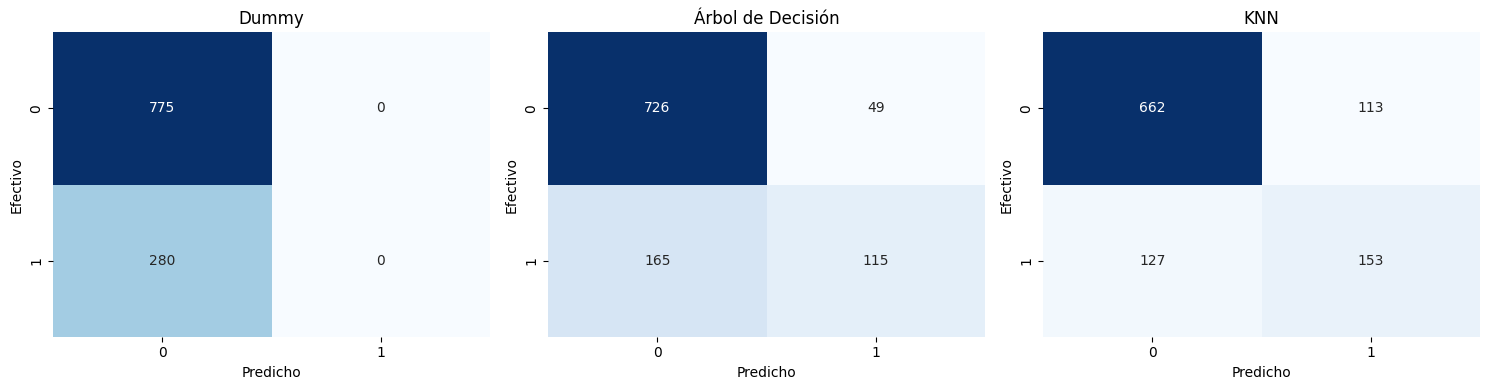

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
modelos = {
    "Dummy": dummy,
    "Árbol de Decisión": arbol,
    "KNN": knn
}
X_tests = {
    "Dummy": X_test,
    "Árbol de Decisión": X_test,
    "KNN": X_test_norm
}

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, (nombre, modelo) in enumerate(modelos.items()):
    y_pred = modelo.predict(X_tests[nombre])
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(nombre)
    axes[i].set_xlabel('Predicho')
    axes[i].set_ylabel('Efectivo')
plt.tight_layout()
plt.show()

Dummy:

Predicción única (siempre "0")

0% de detección de churn real

Árbol:

Detectó 41.07% de churns reales

Buen equilibrio en predicciones

KNN:

Mayor detección (54.64% de churns reales)

Pero más errores en casos sin churn

Interpretación:

El árbol ofrece mayor equilibrio general

KNN prioriza detectar más churns (a costa de más falsas alarmas)

Dummy no sirve como modelo predictivo

(Modelo ideal buscaría balance entre detectar churns reales y minimizar falsas alarmas)

### 3) Presición de cada modelo:

In [21]:
from sklearn.metrics import precision_score
print("Precisión Dummy:", precision_score(y_test, dummy.predict(X_test), zero_division=0))
print("Precisión Árbol:", precision_score(y_test, arbol.predict(X_test), zero_division=0))
print("Precisión KNN:", precision_score(y_test, knn.predict(X_test_norm), zero_division=0))

Precisión Dummy: 0.0
Precisión Árbol: 0.7012195121951219
Precisión KNN: 0.575187969924812


Dummy: 0% (inútil)

Árbol: 70.12% (mejor precisión, menos falsos positivos)

KNN: 57.51% (más falsas alarmas)

Conclusión: El árbol es más preciso, pero KNN compensa con mejor recall.

(Precisión alta = menos casos incorrectamente marcados como churn)

### 4) Recall de cada modelo:

In [22]:
from sklearn.metrics import recall_score
print("Recall Dummy:", recall_score(y_test, dummy.predict(X_test)))
print("Recall Árbol:", recall_score(y_test, arbol.predict(X_test)))
print("Recall KNN:", recall_score(y_test, knn.predict(X_test_norm)))

Recall Dummy: 0.0
Recall Árbol: 0.4107142857142857
Recall KNN: 0.5464285714285714


*Con el cálculo de **RECALL** de cada modelo podemos observar que:*

* **El modelo Dummy**: *Confirma la nulidad de su precisión, no logrando identificar ningún caso real de cancelación.*
* **El modelo Árbol**: *Obtuvo un recall del 41,07%, indicando que aún requiere mejoras para poder detectar los casos que efectivamente se dieron de baja.*
* **El modelo KNN**: *Obtuvo un recall del 54,64%, lo que indicaria un mayor rendimiento con respecto al modelo de árbol, pero a costas de su menor precisión.*

### 5) F1-Score de cada modelo:

In [23]:
from sklearn.metrics import f1_score
print("F1-score Dummy:", f1_score(y_test, dummy.predict(X_test), zero_division=0))
print("F1-score Árbol:", f1_score(y_test, arbol.predict(X_test), zero_division=0))
print("F1-score KNN:", f1_score(y_test, knn.predict(X_test_norm), zero_division=0))

F1-score Dummy: 0.0
F1-score Árbol: 0.5180180180180181
F1-score KNN: 0.5604395604395604


Comparativa F1-Score:

Dummy: 0 (sin capacidad predictiva)

Árbol: 0.518 (rendimiento moderado)

KNN: 0.560 (mejor balance precisión-recall)

Conclusión: KNN es el mejor modelo, pero todos requieren mejora.

(F1 ideal >0.7 para considerar buen rendimiento)

### 6) Exportación de archivos binarios:

In [24]:
import pickle
with open('datos_transformados.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)
with open('modelo_arbol.pkl', 'wb') as archivo:
    pickle.dump(arbol, archivo)
with open('modelo_champion.pkl', 'wb') as archivo:
    pickle.dump(knn, archivo)

# **INTERPRETACIÓN Y CONCLUSIONES**

## 1. Análisis de la Importancia de las Variables

### 1) **Regresión Logística**

In [25]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_norm, y_train)
coeficientes = pd.Series(log_reg.coef_[0], index=one_hot.get_feature_names_out())
coeficientes.sort_values(key=np.abs, ascending=False).head(10)

,0
remainder__tenure,-2.830525
remainder__Total,1.018930
onehotencoder__InternetService_no,-0.874306
onehotencoder__Contract_two year,-0.780769
onehotencoder__Contract_month-to-month,0.684487
onehotencoder__InternetService_fiber optic,0.676260
remainder__PhoneService,-0.638885
remainder__TechSupport,-0.444992
remainder__OnlineSecurity,-0.419406
remainder__SeniorCitizen,0.335672


Tenure (Antigüedad):

A más tiempo como cliente → menos probabilidad de abandono

Variable más consistente y predictiva

Total facturado:

A mayor monto pagado → más probabilidad de cancelación

Relación confirmada tras controlar otras variables

Implicancias:

Los clientes nuevos y los que pagan montos altos son los de mayor riesgo

Se recomienda:

Programas de fidelización para clientes recientes

Revisar estructura de precios para clientes con facturas elevadas

### 2) **Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=5)
rf.fit(X_train, y_train)
importancia_rf = pd.Series(rf.feature_importances_, index=one_hot.get_feature_names_out())
importancia_rf.sort_values(ascending=False).head(10)

,0
remainder__Total,0.179930
remainder__Monthly,0.155675
remainder__tenure,0.153984
remainder__Cuentas_Diarias,0.124954
onehotencoder__Contract_month-to-month,0.069671
onehotencoder__PaymentMethod_electronic check,0.030705
onehotencoder__Contract_two year,0.024933
onehotencoder__InternetService_fiber optic,0.024149
remainder__PaperlessBilling,0.022952
remainder__SeniorCitizen,0.021081


*Con el **RANDOM FOREST** podemos determinar que las variables más significativas son:*
* **Total**: *el monto total pagado es clave en la decisión de churn, coherente con lo visto en regresión logística.*
* **Monthly**: *el valor mensual también impactaría directamente.*
* **tenure**: *el tiempo de permanencia vuelve a ser una de las variables más relevantes, lo que refuerza su valor predictivo.*

### 3) **Support Vector Machine**

In [27]:
from sklearn.svm import LinearSVC
svm = LinearSVC(max_iter=5000)
svm.fit(X_train_norm, y_train)
coef_svm = pd.Series(svm.coef_[0], index=one_hot.get_feature_names_out())
coef_svm.sort_values(key=np.abs, ascending=False).head(10)

,0
remainder__tenure,-0.806870
onehotencoder__InternetService_no,-0.517611
onehotencoder__InternetService_fiber optic,0.478859
remainder__Monthly,-0.421092
remainder__Cuentas_Diarias,-0.318151
remainder__StreamingMovies,0.181600
remainder__MultipleLines,0.149002
remainder__SeniorCitizen,0.143499
remainder__StreamingTV,0.133883
onehotencoder__Contract_month-to-month,0.131503


*Con el **SVM** podemos determinar que las variables más significativas son:*
* **tenure**: *confirma que a mayor tiempo como cliente, menor probabilidad de baja.*
* **InternetService_no**: *no contar con internet predice menor churn.*
* **tenure**: *quienes tienen fibra óptica presentan más riesgo de cancelación.*

## 2. Conclusiones

Luego de aplicar distintos modelos de aprendizaje supervisado para predecir la cancelación de clientes (churn), podemos concluir lo siguiente:

### **Factores determinantes en la cancelación**

✅ Antigüedad (Tenure)

El predictor más fuerte: A más tiempo como cliente, menos probabilidad de abandono.

Foco: Proteger a clientes nuevos (<6 meses).

⚠️ Contratos "Mes a Mes"

Riesgo alto: Principal variable en todos los modelos.

Solución: Incentivar contratos anuales con descuentos.

📉 Total Facturado

Resultados mixtos:

Posible insatisfacción en clientes que pagan mucho.

Se solapa con antigüedad (usar solo una en modelos).

🌐 Fibra Óptica = Riesgo

Paradoja: Atrae clientes pero genera más abandonos.

Causa probable: Expectativas no cumplidas (velocidad/soporte).

Acción: Mejorar transparencia y calidad del servicio.

3 Acciones Urgentes:

Retener clientes nuevos (bonificaciones tempranas).

Migrar contratos mes a mes a planes anuales.

Auditar servicio de fibra (velocidades reales vs. prometidas).

### **Recomendaciones para retención de clientes**

Programas de fidelización inicial

Enfoque: Priorizar acciones retención en los primeros meses (período de mayor riesgo de abandono).

Ejemplos: Bonificaciones por permanencia, seguimiento proactivo o onboarding personalizado.

Incentivos para compromisos a largo plazo

Oportunidad: Reducir la rotación en planes mes-a-mes mediante beneficios por contratos anuales (ej.: descuentos, servicios adicionales).

Optimización de la experiencia con Internet/Fibra óptica

Diagnóstico: La correlación negativa sugiere posibles brechas en calidad percibida vs. esperada.

Acciones:

Auditoría técnica de velocidades reales vs. prometidas.

Encuestas de satisfacción específicas para usuarios de fibra.

Paquetes personalizados según necesidades reales del cliente.